In [1]:
#Stock market analysis
%pip install pandas
%pip install transformers
%pip install pandas
%pip install torch
%pip install shap
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data/finance_stocks/finance_stocks-train.csv', nrows=10)

df.head()

,timestamp,tweet_text,tweet_url,tweet_type,price_of_ticker,change_of_ticker,tickers_mentioned,category
0,2023-11-15T09:36:42.028000+00:00,$GOLD's Massive Range.\n\nIn the past ~year we...,https://twitter.com/user/status/17247221551437...,tweet,['15.71'],['+3.69%'],['$GOLD'],stock_images
1,2023-11-15T06:01:59.788000+00:00,RT @SmartReversals: $SPX - Daily Chart:\n\n✅Ta...,https://twitter.com/user/status/17246687922221...,retweet,['4495.71'],['+1.87%'],['$SPX'],stock_images
2,2023-11-15T06:01:55.590000+00:00,RT @SmartReversals: $NDX - Daily Chart:\n\n✅Ta...,https://twitter.com/user/status/17246687824535...,retweet,['15812.473'],['+2.08%'],['$NDX'],stock_images
3,2023-11-15T06:01:51.329000+00:00,RT @SmartReversals: $IWM - Daily Chart:\n\n✅Ta...,https://twitter.com/user/status/17246687591081...,retweet,['178.46'],['+5.21%'],['$IWM'],stock_images
4,2023-11-15T04:01:49.009000+00:00,RT @coiledspringcap: Everyone has been concern...,https://twitter.com/user/status/17246376898767...,retweet,['4495.71'],['+1.87%'],['$SPX'],stock_images


In [4]:
from transformers import pipeline

/Users/pascalcsukovits/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")


In [25]:
predictions = [pipe(text)[0]['label'] for text in df["tweet_text"]]
df['Sentiment'] = predictions

In [31]:
df[['Sentiment', 'tweet_text']]

,Sentiment,tweet_text
0,positive,$GOLD's Massive Range.\n\nIn the past ~year we...
1,neutral,RT @SmartReversals: $SPX - Daily Chart:\n\n✅Ta...
2,neutral,RT @SmartReversals: $NDX - Daily Chart:\n\n✅Ta...
3,neutral,RT @SmartReversals: $IWM - Daily Chart:\n\n✅Ta...
4,negative,RT @coiledspringcap: Everyone has been concern...
5,positive,RT @coiledspringcap: #SPX equal weight breakin...
6,positive,RT @TriggerTrades: $SPX remained above 4375 th...
7,neutral,"RT @TrendSpider: $SPY, $QQQ and $AAPL all prin..."
8,neutral,$NET \n\nWas waiting on Cloudflare and it erup...
9,neutral,Currently at $2860--Documenting everything in ...


In [32]:
explainer = shap.Explainer(pipe)
shap_values = explainer(df["tweet_text"])

PartitionExplainer explainer: 11it [02:03, 12.38s/it]                        


In [57]:
shap_values

.values =
array([array([[ 0.00000000e+00, -2.18786299e-05,  1.61486239e-03],
              [ 0.00000000e+00, -2.18786299e-05,  1.61486239e-03],
              [ 0.00000000e+00, -2.18786299e-05,  1.61486239e-03],
              [ 0.00000000e+00, -2.18786299e-05,  1.61486239e-03],
              [ 0.00000000e+00, -2.18786299e-05,  2.82883919e-03],
              [ 0.00000000e+00, -2.18786299e-05,  2.82883919e-03],
              [ 0.00000000e+00, -2.18786299e-05,  2.82883919e-03],
              [ 0.00000000e+00, -2.18786299e-05,  2.31153172e-03],
              [ 0.00000000e+00, -2.18786299e-05,  5.93582968e-04],
              [ 0.00000000e+00, -2.18786299e-05,  5.93582968e-04],
              [ 0.00000000e+00, -2.18786299e-05,  5.93582968e-04],
              [ 0.00000000e+00, -2.18786299e-05,  5.93582968e-04],
              [ 0.00000000e+00, -2.18786299e-05,  5.93582968e-04],
              [ 0.00000000e+00, -2.18786299e-05,  5.93582968e-04],
              [ 0.00000000e+00, -2.18786299e-05,  5.

/Users/pascalcsukovits/Library/Python/3.9/lib/python/site-packages/shap/plots/_beeswarm.py:962: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  pl.tight_layout()
/Users/pascalcsukovits/Library/Python/3.9/lib/python/site-packages/shap/plots/_beeswarm.py:962: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()
/Users/pascalcsukovits/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


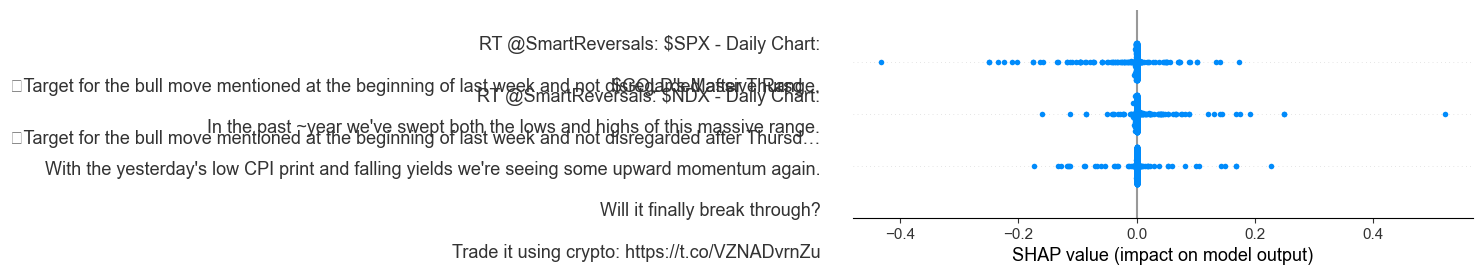

In [77]:
shap_values_2d = np.vstack(shap_values)

# Visualize SHAP values for each token
shap.summary_plot(shap_values_2d, features=texts)